In [144]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [145]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline


from scipy.stats import boxcox
from scipy.stats.mstats import normaltest

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error



from sklearn.pipeline import Pipeline

In [146]:

data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

we have 205 entries or rows, as well as 26 features, We also have a mix of numerical (8 int64 and 8 float64) and object data types (10 object).



In [148]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Data cleaning and Wrangling

In [149]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Also, check for any duplicates by running duplicated() function through 'car_ID' records, since each row has a unique car ID value.

In [150]:
sum(data.duplicated(subset = 'car_ID')) == 0


True

In [151]:
data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

We can see that the 'CarName' includes both the company name (brand) and the car model. Next, we want to split a company name from the model of a car, as for our model building purpose, we will focus on a company name only.

In [152]:
data.CarName

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [153]:
data['brand'] = data.CarName.str.split(' ').str.get(0).str.lower()
data.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
114,115,0,peugeot 505s turbo diesel,diesel,turbo,four,wagon,rwd,front,114.2,...,idi,3.70,3.52,21.0,95,4150,25,25,17075.0,peugeot
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
39,40,0,honda prelude,gas,std,four,sedan,fwd,front,96.5,...,1bbl,3.15,3.58,9.0,86,5800,27,33,8845.0,honda
140,141,2,subaru dl,gas,std,two,hatchback,4wd,front,93.3,...,2bbl,3.62,2.64,8.7,73,4400,26,31,7603.0,subaru
111,112,0,peugeot 504,gas,std,four,sedan,rwd,front,107.9,...,mpfi,3.46,2.19,8.4,95,5000,19,24,15580.0,peugeot


In [154]:
data.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [155]:
data.brand.value_counts()

brand
toyota         31
nissan         18
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
jaguar          3
chevrolet       3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
mercury         1
porcshce        1
Name: count, dtype: int64

There are some typos in the names of the cars, so they should be corrected.



In [156]:
data['brand'] = data['brand'].replace(['vw', 'vokswagen'], 'volkswagen')
data['brand'] = data['brand'].replace(['maxda'], 'mazda')
data['brand'] = data['brand'].replace(['porcshce'], 'porsche')
data['brand'] = data['brand'].replace(['toyouta'], 'toyota')


In [157]:
data.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Let's plot and sort the total number of Brands.



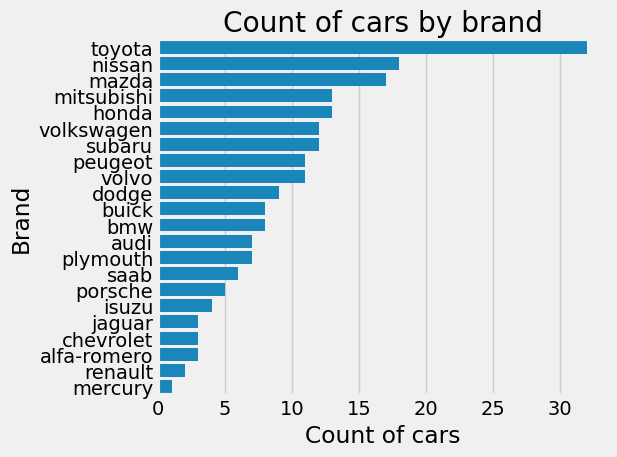

In [158]:
sns.countplot(data=data, y='brand', order=pd.value_counts(data['brand']).index)

plt.title('Count of cars by brand')
plt.xlabel('Count of cars')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

We can drop 'car_ID', 'symboling', and 'CarName' from our data frame, since they will no longer be needed.



In [159]:
data.drop(['car_ID', 'symboling', 'CarName'], axis=1, inplace=True)

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

Exercise 1

In this exercise, explore any (or all) object variables of your interest.




In [161]:
data.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [162]:
data.enginelocation.unique()

array(['front', 'rear'], dtype=object)

Next, we need to engineer some features, for better visualizations and analysis. We will group our data by 'brand', calculate the average price for each brand, and split these prices into 3 bins: 'Budget', 'Mid-Range', and 'Luxury' cars, naming the newly created column - the 'brand_category'.



In [163]:
data_camp_avg_price = (
    data[['brand', 'price']]
    .groupby('brand', as_index=False)
    .mean()
    .rename(columns={'price': 'brand_avg_price'})
)

data_camp_avg_price.shape

(22, 2)

In [164]:
data = data.merge(data_camp_avg_price, on='brand')

In [165]:
data.brand_avg_price.describe()

count      205.000000
mean     13276.710571
std       7154.179185
min       6007.000000
25%       9239.769231
50%      10077.500000
75%      15489.090909
max      34600.000000
Name: brand_avg_price, dtype: float64

In [166]:
data['brand_category']= data['brand_avg_price'].apply(lambda x: 'Budget' if x < 10000
                              else ('Mid_range' if 10000 <= x < 20000
                                    else 'Luxury'))

data.sample(3)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,brand_avg_price,brand_category
34,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,52.6,...,3.41,9.2,76,6000,30,34,7129.0,honda,8184.692308,Budget
85,gas,std,four,sedan,fwd,front,96.3,172.4,65.4,51.6,...,3.46,8.5,88,5000,25,32,6989.0,mitsubishi,9239.769231,Budget
123,gas,std,four,wagon,fwd,front,103.3,174.6,64.6,59.8,...,3.46,8.5,88,5000,24,30,8921.0,plymouth,7963.428571,Budget


### Exploratory Data Analysis

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [168]:
categorical  = data.select_dtypes(include=['object']).columns.tolist()
categorical

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'brand',
 'brand_category']

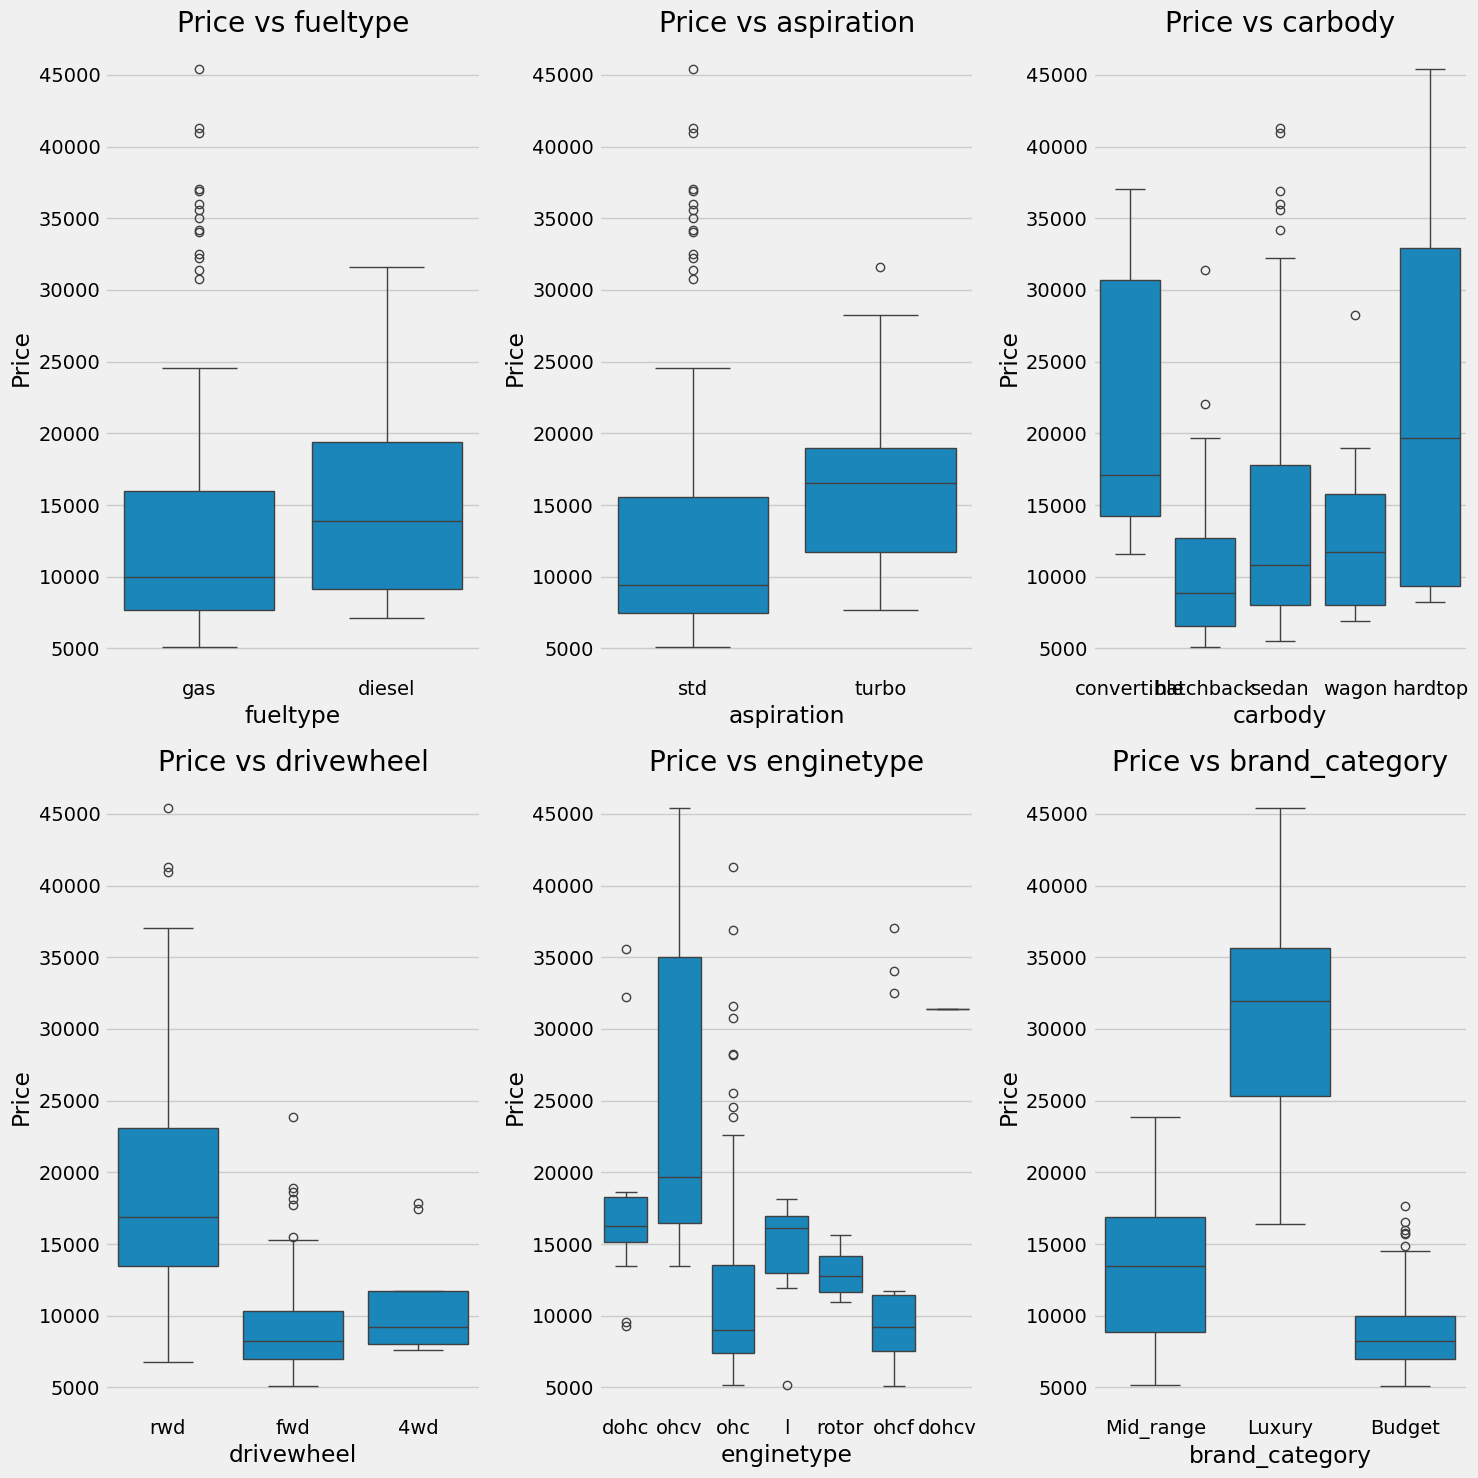

In [169]:
colums = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'brand_category']

fig, ax = plt.subplots(2, 3, figsize=(15, 15))

ax = ax.flatten()

for i, col in enumerate(colums):
    sns.boxplot(x=col, y='price', data=data, ax=ax[i])
    ax[i].set_title(f'Price vs {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Price')

plt.tight_layout()
plt.show()



Next, let's view the list of top features that have high correlation coefficient. The corr() function calculates the Pearson'r correlation coefficients with respect to the 'price'.



In [170]:
corr_matrix = data.corr(numeric_only=True)

corr_matrix['price'].sort_values(ascending=False)

price               1.000000
brand_avg_price     0.895520
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

### Testing Assumptions for Linear Regression
1. Linearity Assumption


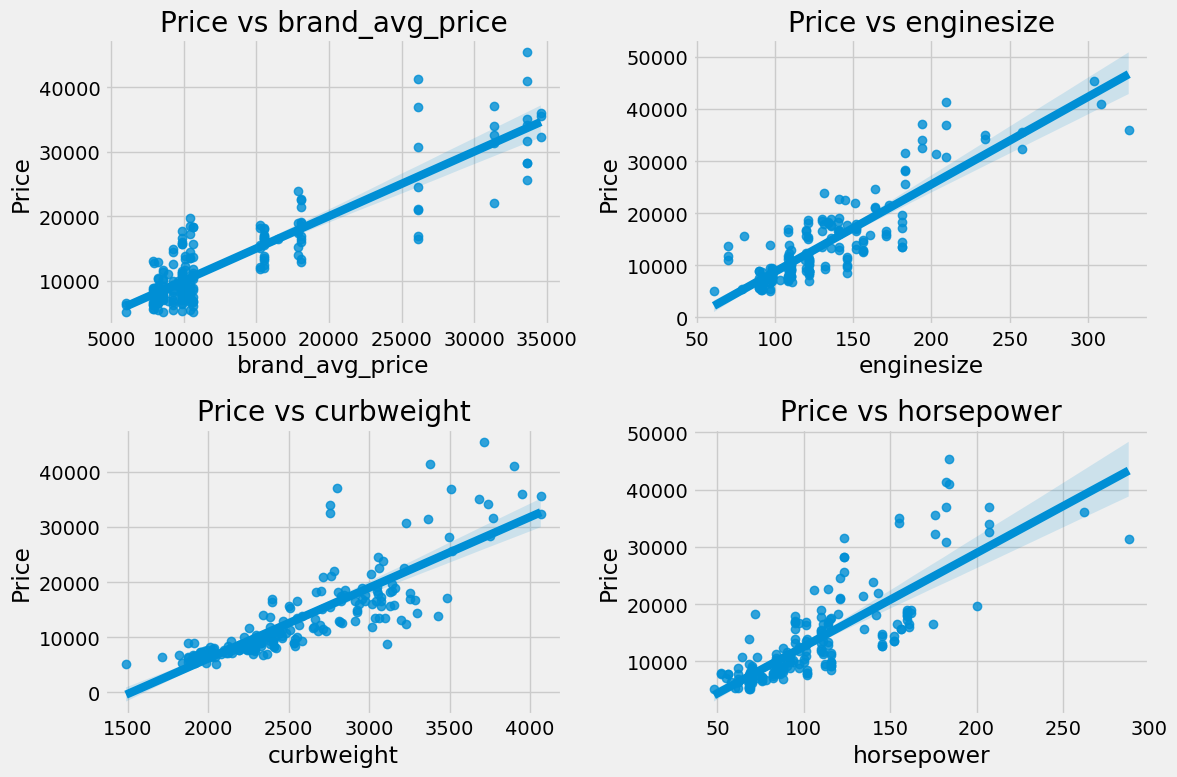

In [171]:
colums = ['brand_avg_price', 'enginesize', 'curbweight', 'horsepower']

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax = ax.flatten()

for i, col in enumerate(colums):
    sns.regplot(x=col, y='price', data=data, ax=ax[i])
    ax[i].set_title(f'Price vs {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Price')

plt.tight_layout()
plt.show()


2. Homoscedasticity

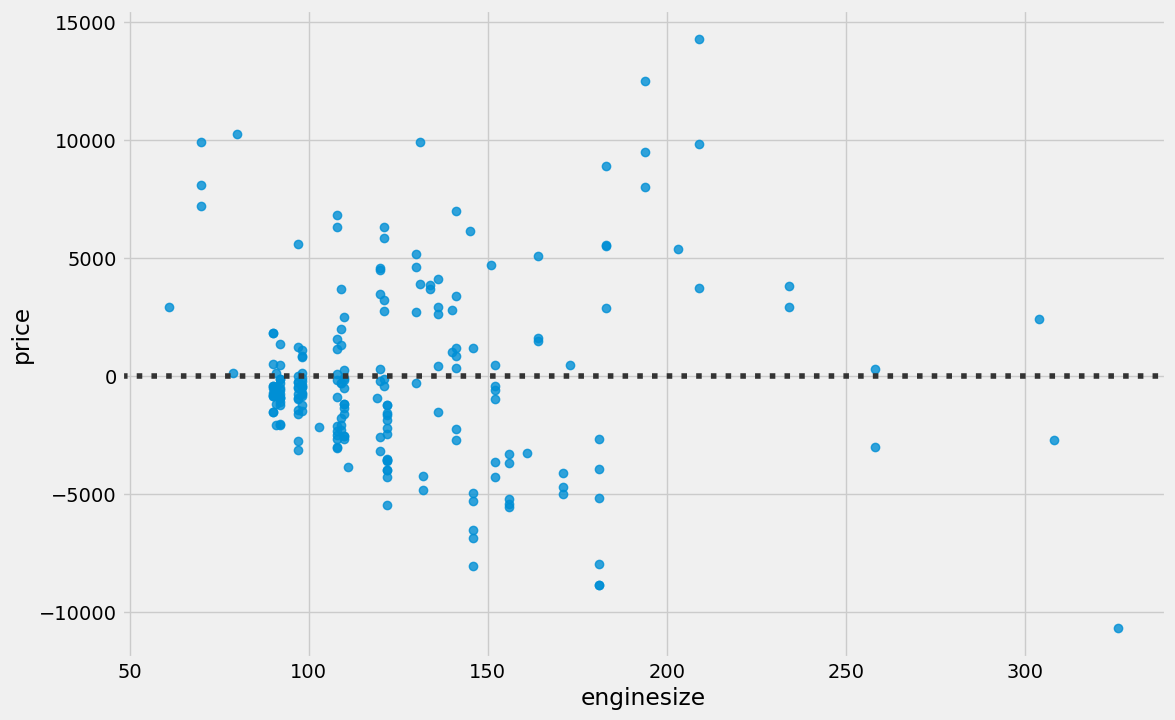

In [172]:
plt.subplots(figsize = (12,8))

sns.residplot(data = data , x = 'enginesize', y = 'price')
plt.show()


3. Normality


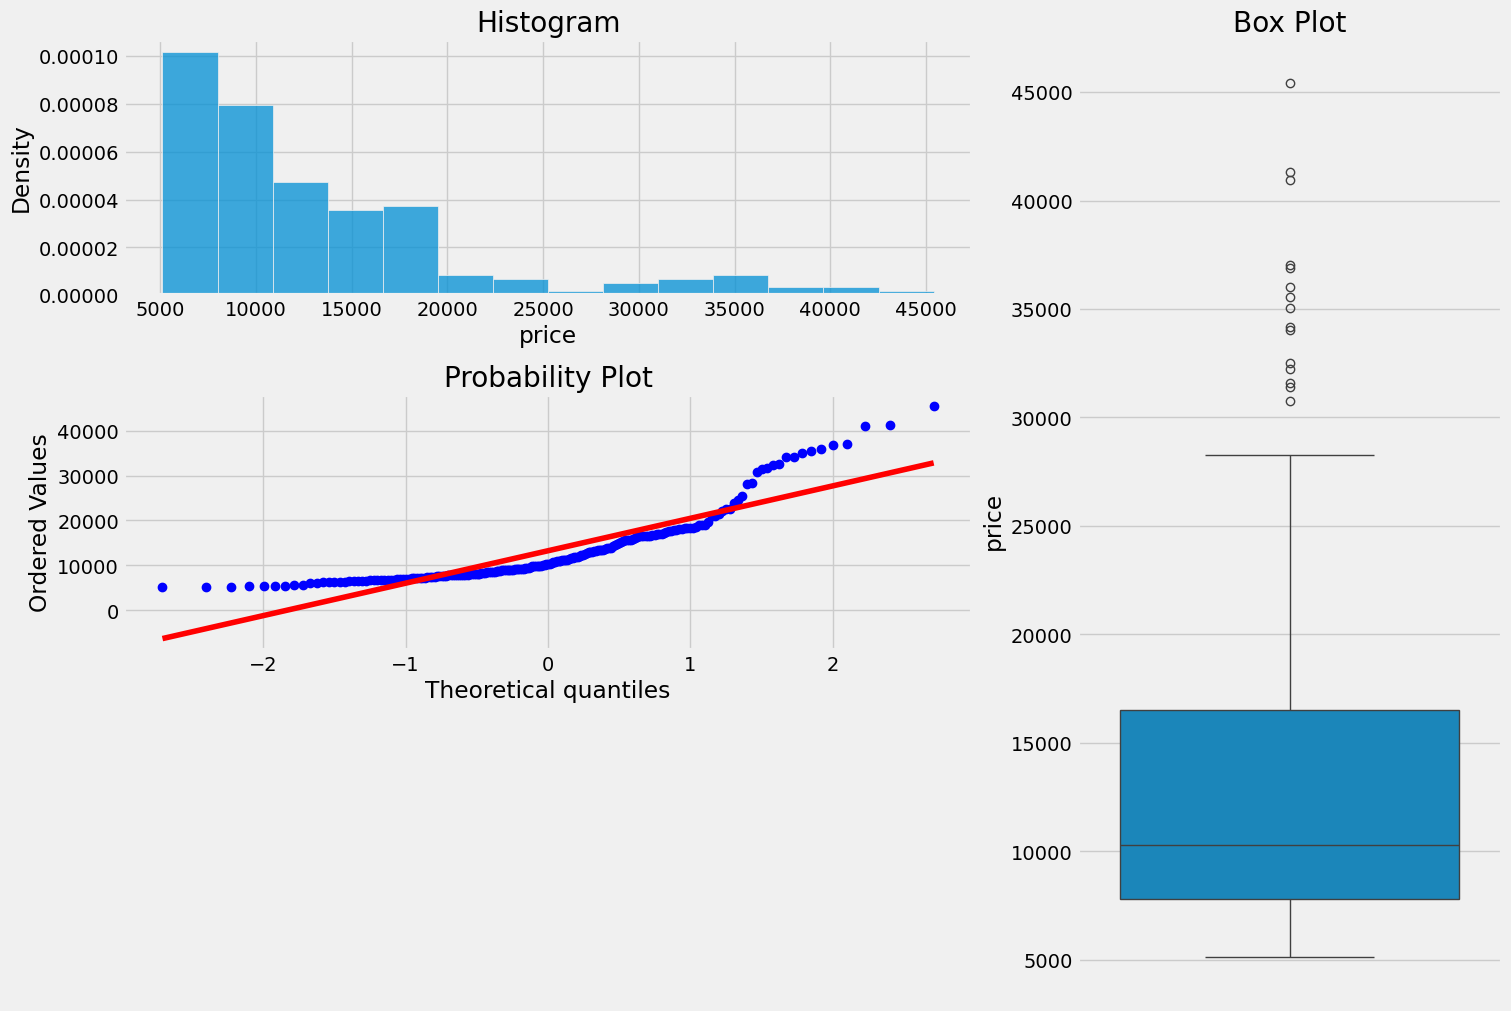

In [173]:
def plotting_3_chart(data, feature):

    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    fig = plt.figure(constrained_layout=True, figsize=(15,10))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.histplot(data.loc[:, feature], stat='density', ax=ax1)

    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('Q-Q Plot')
    stats.probplot(data.loc[:, feature], plot = ax2)

    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')

    sns.boxplot(data.loc[:, feature], orient='v', ax=ax3)

    plt.show()

plotting_3_chart(data, 'price')

In [174]:
previous_data = data.copy()

Log Transformation


In [175]:
normaltest(data.price.values)

NormaltestResult(statistic=77.37514013383584, pvalue=1.578344501676757e-17)

As we can see, the p-value is very small, so it is not normally distributed.



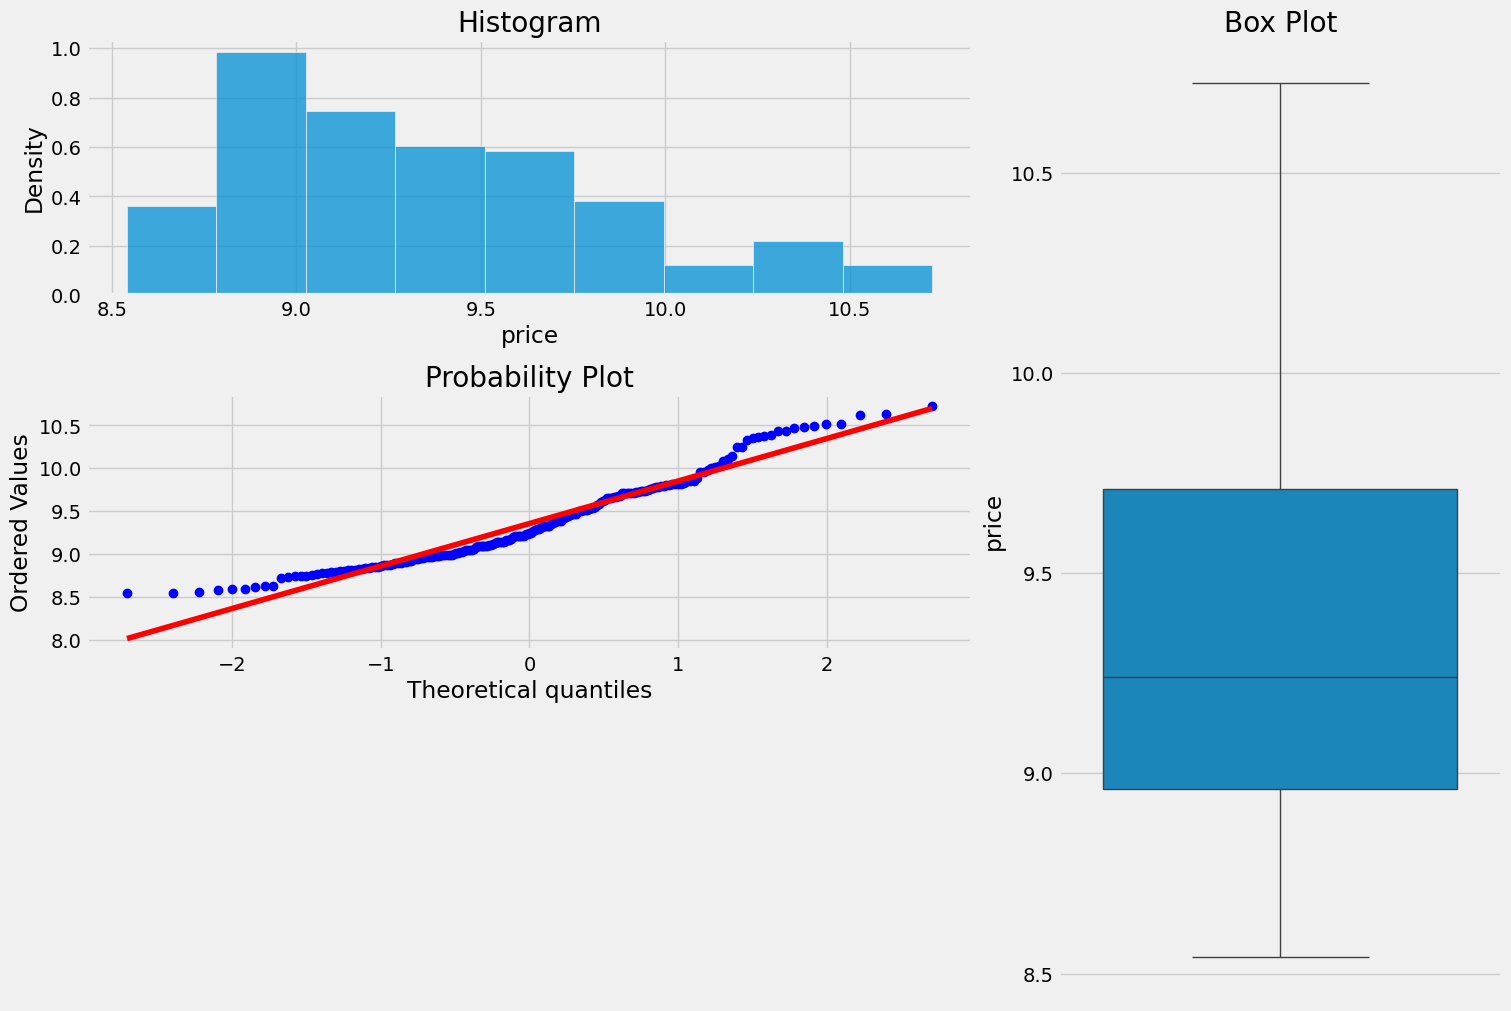

In [176]:
data['price'] = np.log(data['price'])

plotting_3_chart(data, 'price')

In [177]:
normaltest(data.price.values)

NormaltestResult(statistic=14.10341345775947, pvalue=0.0008659297880185564)

In [178]:
cp_result = boxcox(previous_data.price)
boxcox_price = cp_result[0]

normaltest(boxcox_price)

NormaltestResult(statistic=16.727141852202635, pvalue=0.00023321006918393855)

4. Multicollinearity


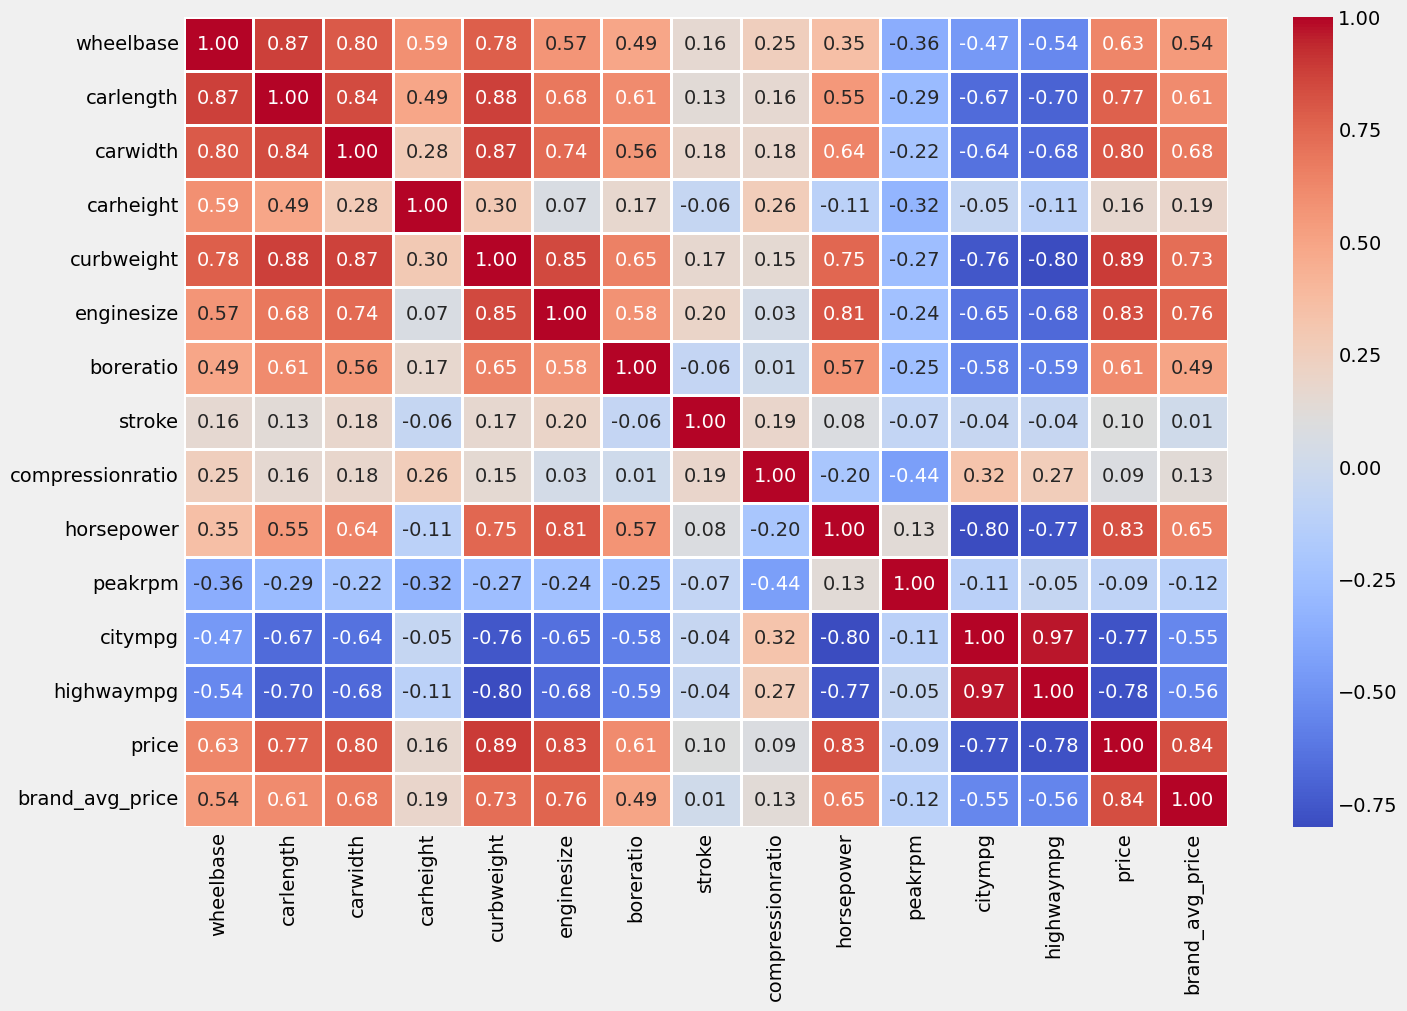

In [179]:
num = data.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(15, 10))
sns.heatmap(num.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()

Linear regression model

In [180]:
columns=['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase', 'brand_category',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'carlength','carwidth','citympg','highwaympg']



selected = data[columns]
selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           205 non-null    float64
 1   fueltype        205 non-null    object 
 2   aspiration      205 non-null    object 
 3   carbody         205 non-null    object 
 4   drivewheel      205 non-null    object 
 5   wheelbase       205 non-null    float64
 6   brand_category  205 non-null    object 
 7   curbweight      205 non-null    int64  
 8   enginetype      205 non-null    object 
 9   cylindernumber  205 non-null    object 
 10  enginesize      205 non-null    int64  
 11  boreratio       205 non-null    float64
 12  horsepower      205 non-null    int64  
 13  carlength       205 non-null    float64
 14  carwidth        205 non-null    float64
 15  citympg         205 non-null    int64  
 16  highwaympg      205 non-null    int64  
dtypes: float64(5), int64(5), object(7)


In [181]:
categorical_columns=[key for key, value in selected.dtypes.items()  if value=='O']
categorical_columns

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'brand_category',
 'enginetype',
 'cylindernumber']

In [182]:
numeric_columns = list(set(columns) - set(categorical_columns))
numeric_columns

['highwaympg',
 'wheelbase',
 'price',
 'citympg',
 'enginesize',
 'curbweight',
 'horsepower',
 'carwidth',
 'carlength',
 'boreratio']

We can split the data into the features X and target y.



In [183]:
X = selected.drop('price', axis=1)
X.sample(3)

,fueltype,aspiration,carbody,drivewheel,wheelbase,brand_category,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg
25,gas,std,sedan,fwd,93.7,Budget,1989,ohc,four,90,2.97,68,157.3,63.8,31,38
41,gas,std,sedan,fwd,96.5,Budget,2465,ohc,four,110,3.15,101,175.4,65.2,24,28
65,gas,std,sedan,rwd,104.9,Mid_range,2670,ohc,four,140,3.76,120,175.0,66.1,19,27


In [184]:
y = selected['price'].copy()
y.sample(3)

201    9.854560
52     8.823942
59     9.087608
Name: price, dtype: float64

In [185]:
for column in categorical_columns:
    print(f'column name: ', column)
    print('value_counts: ')
    print(X[column].value_counts())

column name:  fueltype
value_counts: 
fueltype
gas       185
diesel     20
Name: count, dtype: int64
column name:  aspiration
value_counts: 
aspiration
std      168
turbo     37
Name: count, dtype: int64
column name:  carbody
value_counts: 
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
column name:  drivewheel
value_counts: 
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64
column name:  brand_category
value_counts: 
brand_category
Budget       95
Mid_range    86
Luxury       24
Name: count, dtype: int64
column name:  enginetype
value_counts: 
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64
column name:  cylindernumber
value_counts: 
cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64


OneHotEncoder


In [186]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [187]:
one_hot = ColumnTransformer(
    transformers=[('one_hot', OneHotEncoder(), categorical_columns)], 
    remainder='passthrough')
X = one_hot.fit_transform(X)
type(X)

numpy.ndarray

In [188]:
names = one_hot.get_feature_names_out()
names

array(['one_hot__fueltype_diesel', 'one_hot__fueltype_gas',
       'one_hot__aspiration_std', 'one_hot__aspiration_turbo',
       'one_hot__carbody_convertible', 'one_hot__carbody_hardtop',
       'one_hot__carbody_hatchback', 'one_hot__carbody_sedan',
       'one_hot__carbody_wagon', 'one_hot__drivewheel_4wd',
       'one_hot__drivewheel_fwd', 'one_hot__drivewheel_rwd',
       'one_hot__brand_category_Budget', 'one_hot__brand_category_Luxury',
       'one_hot__brand_category_Mid_range', 'one_hot__enginetype_dohc',
       'one_hot__enginetype_dohcv', 'one_hot__enginetype_l',
       'one_hot__enginetype_ohc', 'one_hot__enginetype_ohcf',
       'one_hot__enginetype_ohcv', 'one_hot__enginetype_rotor',
       'one_hot__cylindernumber_eight', 'one_hot__cylindernumber_five',
       'one_hot__cylindernumber_four', 'one_hot__cylindernumber_six',
       'one_hot__cylindernumber_three', 'one_hot__cylindernumber_twelve',
       'one_hot__cylindernumber_two', 'remainder__wheelbase',
       'remain

In [189]:
colunm_names=[name[name.find("_")+1:] for name in  [name[name.find("__")+2:] for name in names]]
colunm_names

['diesel',
 'gas',
 'std',
 'turbo',
 'convertible',
 'hardtop',
 'hatchback',
 'sedan',
 'wagon',
 '4wd',
 'fwd',
 'rwd',
 'category_Budget',
 'category_Luxury',
 'category_Mid_range',
 'dohc',
 'dohcv',
 'l',
 'ohc',
 'ohcf',
 'ohcv',
 'rotor',
 'eight',
 'five',
 'four',
 'six',
 'three',
 'twelve',
 'two',
 'wheelbase',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'carlength',
 'carwidth',
 'citympg',
 'highwaympg']

In [190]:
df = pd.DataFrame(X, columns=colunm_names)

Exercisa 7

In [191]:
X_ = selected[categorical_columns + numeric_columns]


X_numeric = X_[numeric_columns].to_numpy()
X_categorical = OneHotEncoder().fit_transform(X_[categorical_columns]).toarray()
X_ = np.concatenate([X_numeric, X_categorical], axis=1)



Train Test Split


In [192]:
from sklearn.model_selection import train_test_split

In [193]:
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

Standardize the Data


In [194]:
from sklearn.preprocessing import StandardScaler


In [195]:
ss = StandardScaler()
ss

StandardScaler()

In [196]:
X_train = ss.fit_transform(X_train)

Linear Regression


In [197]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

Making Prediction

In [198]:
X_test = ss.transform(X_test)
car_price_predictions = lm.predict(X_test)
car_price_predictions  

array([ 8.86257510e+00,  9.78933291e+00,  9.36306338e+00, -8.52321063e+12,
        9.23952822e+00,  9.33132510e+00,  8.67678408e+00,  8.78909640e+00,
        9.70241885e+00,  8.82546572e+00,  9.87722353e+00, -1.55612716e+12,
        9.43288760e+00,  9.58132510e+00,  8.71120791e+00,  9.26442294e+00,
        9.08547549e+00,  9.62331728e+00,  8.98903994e+00,  8.77199893e+00,
        9.20022158e+00,  9.55886416e+00,  9.09865908e+00,  9.31305270e+00,
        9.80886416e+00,  8.83108096e+00,  8.87038760e+00,  9.58803896e+00,
        8.86843447e+00,  8.85476260e+00,  9.12624697e+00,  9.24709658e+00,
        1.00008808e+01,  9.09402041e+00,  8.86941103e+00,  1.03987079e+01,
        9.44460635e+00,  9.66848330e+00,  8.75588564e+00,  1.04172626e+01,
        8.70046572e+00,  9.44558291e+00,  1.05017353e+01,  9.38137393e+00,
        9.26113467e+00,  8.82253603e+00,  8.82351260e+00,  9.43984561e+00,
        9.20583682e+00,  9.14577822e+00,  9.86452822e+00,  8.92800478e+00,
        8.93630557e+00,  

Model Evaluation


In [199]:
mse = mean_squared_error(y_test, car_price_predictions)
mse

1.2107524388008745e+24

In [200]:
lm.score(X_test, y_test)

-4.705040652959211e+24

In [201]:
from sklearn.metrics import r2_score 


In [202]:
r2_score(y_test, car_price_predictions)

-4.705040652959211e+24

Pipeline Object


In [203]:
steps = [('scaler', StandardScaler()), ('lm', LinearRegression())]

In [204]:
pipe = Pipeline(steps = steps)

In [205]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lm', LinearRegression())])

In [206]:
car_price_predictions = pipe.predict(X_test)
mse = mean_squared_error(y_test, car_price_predictions)
print(f'mse: {mse}')
rmse = np.sqrt(mse)
print(f'rmse: {rmse}')
r2_score(y_test, car_price_predictions)
print(f'r2_score: {r2_score(y_test, car_price_predictions)}')

mse: 3.0343251797164175e+24
rmse: 1741931450923.4907
r2_score: -1.1791529686285855e+25


In [214]:
X = selected[categorical_columns + numeric_columns]
one_hot = ColumnTransformer(transformers=[("one_hot", OneHotEncoder(), categorical_columns) ],remainder="passthrough")

steps = [("one_hot", one_hot), ("scaler", StandardScaler()), ("lm", LinearRegression())]

pipe = Pipeline(steps = steps)

pipe.fit(X, y)

car_price_predictions = pipe.predict(X)
r2_score(car_price_predictions, y)

print(f'mse: {mse}')
print(f'rmse: {rmse}')
print(f'r2_score: {r2_score(y, car_price_predictions)}')


mse: 3.694177897620348e-31
rmse: 1741931450923.4907
r2_score: 1.0
